<h2 style ="color:purple;">Import Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import graphviz
from matplotlib import pyplot as plt
import math
import os
import pickle
from nltk.corpus import stopwords
from string import punctuation as puncs
import nltk
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from sklearn.cluster import KMeans
from spacy.lang.en import English
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

C:\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anas_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anas_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2 style = "color:purple">Data Ingestion</h2>

In [2]:
data = pd.read_pickle('./lda_score_df.pkl')
data.head()

,business,tech,entertainment,politics,sport,doc_label,true_label
0,0.000000,0.793176,0.606020,0.060099,0.000000,tech,tech
1,0.898768,0.198901,0.174393,0.284308,0.203494,business,business
2,0.000000,0.000000,0.000000,0.200206,0.979754,sport,sport
3,0.000000,0.000000,0.000000,0.000000,1.000000,sport,sport
4,0.055238,0.109776,0.992420,0.000000,0.000000,entertainment,entertainment


## A deeper look into the data

In [3]:
data.shape

(2225, 7)

In [4]:
data.doc_label.value_counts()

sport            524
politics         500
business         473
entertainment    389
tech             339
Name: doc_label, dtype: int64

In [5]:
data.true_label.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: true_label, dtype: int64

<h2 style = "color:purple">Data Preprocessing</h2>

In [6]:
data_copy = data.copy()
data_copy.head()

,business,tech,entertainment,politics,sport,doc_label,true_label
0,0.000000,0.793176,0.606020,0.060099,0.000000,tech,tech
1,0.898768,0.198901,0.174393,0.284308,0.203494,business,business
2,0.000000,0.000000,0.000000,0.200206,0.979754,sport,sport
3,0.000000,0.000000,0.000000,0.000000,1.000000,sport,sport
4,0.055238,0.109776,0.992420,0.000000,0.000000,entertainment,entertainment


###  As seen here, our text will be classified into one of these categories, named :
* sport
* business
* politics
* tech
* entertainment


In [7]:
X_features=data_copy.columns[:5]
X = data_copy[X_features]
y = data_copy.true_label

### Binning

*Binning is not that useful here* and all values are already between 0-1

<h2 style = "color:purple">Learn Classification Model</h3>

In [8]:
X = data_copy[X_features]
X.head()

,business,tech,entertainment,politics,sport
0,0.000000,0.793176,0.606020,0.060099,0.000000
1,0.898768,0.198901,0.174393,0.284308,0.203494
2,0.000000,0.000000,0.000000,0.200206,0.979754
3,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.055238,0.109776,0.992420,0.000000,0.000000


In [9]:
y = data_copy.true_label
y.head()

0             tech
1         business
2            sport
3            sport
4    entertainment
Name: true_label, dtype: object

In [10]:
randomState=0
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state =randomState)

### Extra Tree

In [11]:
extra_tree_classifier = ExtraTreesClassifier(n_estimators = 50,max_depth=8)
extra_tree_classifier.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=8, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
y_train_predict = extra_tree_classifier.predict(X_train)
y_predict = extra_tree_classifier.predict(X_test)

In [13]:
train_acc_score_ext = accuracy_score(y_train,y_train_predict)
test_acc_score_ext = accuracy_score(y_test,y_predict)
print("Extra Tree Classifier")
print("Train Accuracy : ",train_acc_score_ext)
print("Test Accuracy :" ,test_acc_score_ext)

Extra Tree Classifier
Train Accuracy :  0.9316546762589928
Test Accuracy : 0.8886894075403949


### Decision Tree

In [14]:
decision_tree_classifier = DecisionTreeClassifier()
clf=decision_tree_classifier.fit(X_train,y_train)

In [15]:
print("Tree nodes count:",clf.tree_.node_count)

Tree nodes count: 421


In [16]:
y_train_predict = decision_tree_classifier.predict(X_train)
y_predict = decision_tree_classifier.predict(X_test)

In [17]:
train_acc_score_dt = accuracy_score(y_train,y_train_predict)
test_acc_score_dt = accuracy_score(y_test,y_predict)
print("Decision Tree Scores")
print("Train Accuracy : ",train_acc_score_dt)
print("Test Accuracy :" ,test_acc_score_dt)

Decision Tree Scores
Train Accuracy :  0.9928057553956835
Test Accuracy : 0.8904847396768402


In [18]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X_features,  
                     class_names=data.true_label.values,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree_before_optimization")

'decision_tree_before_optimization.pdf'

#### Optimizing Decision Tree parameters

#### For optimizing max_leaf_nodes

In [19]:
leaf_count=[50,60,70,80,90,100,110,120,130,140,150]
training_accuracy=[]
testing_accuracy=[]
for c in leaf_count:
    decision_tree_classifier = DecisionTreeClassifier(max_leaf_nodes=c)
    clf = decision_tree_classifier.fit(X_train,y_train)
    
    y_train_predict = decision_tree_classifier.predict(X_train)
    y_predict = decision_tree_classifier.predict(X_test)

    train_acc_score_dt = accuracy_score(y_train,y_train_predict)
    test_acc_score_dt = accuracy_score(y_test,y_predict)
    training_accuracy.append(train_acc_score_dt)
    testing_accuracy.append(test_acc_score_dt)
    
#     print('For max_leaf_nodes=%d:' %c)
#     print('Training Accuracy = ',training_score)
#     print('Testing Accuracy = ',testing_score)



In [20]:
accuracy_df=pd.DataFrame({'Max Leaf Nodes':leaf_count,
                              'Training Accuracy':training_accuracy,
                              'Testing Accuracy':testing_accuracy})
accuracy_df

,Max Leaf Nodes,Training Accuracy,Testing Accuracy
0,50,0.920863,0.890485
1,60,0.931655,0.892280
2,70,0.938249,0.901257
3,80,0.945444,0.897666
4,90,0.951439,0.899461
5,100,0.955036,0.894075
6,110,0.958034,0.888689
7,120,0.962830,0.890485
8,130,0.965827,0.883303
9,140,0.968825,0.883303


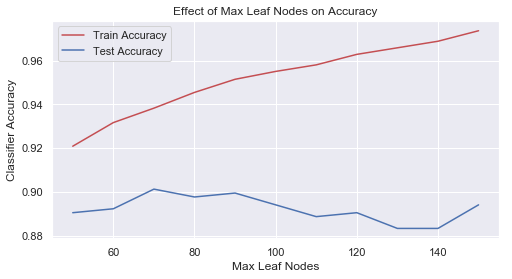

In [21]:
sns.set()
plt.plot(leaf_count, training_accuracy,'r')
plt.plot(leaf_count, testing_accuracy,'b')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Classifier Accuracy')
plt.title('Effect of Max Leaf Nodes on Accuracy')
plt.gcf().set_size_inches(8, 4)
plt.show()

So, max_leaf_nodes=70 gives best accuracy without overfitting

#### For optimizing tree "min_sample_leafs"

The minimum number of samples required to be at a leaf node.

In [22]:
min_leaf=[2,4,6,8,10,12,14,16,18,20,25]
training_accuracy=[]
testing_accuracy=[]
for c in min_leaf:
    decision_tree_classifier = DecisionTreeClassifier(max_depth=c)
    clf = decision_tree_classifier.fit(X_train,y_train)
    
    y_train_predict = decision_tree_classifier.predict(X_train)
    y_predict = decision_tree_classifier.predict(X_test)

    train_acc_score_dt = accuracy_score(y_train,y_train_predict)
    test_acc_score_dt = accuracy_score(y_test,y_predict)
    training_accuracy.append(train_acc_score_dt)
    testing_accuracy.append(test_acc_score_dt)

In [23]:
accuracy_df=pd.DataFrame({'Min Leaf':min_leaf,
                              'Training Accuracy':training_accuracy,
                              'Testing Accuracy':testing_accuracy})
accuracy_df


,Min Leaf,Training Accuracy,Testing Accuracy
0,2,0.614508,0.635548
1,4,0.851918,0.852783
2,6,0.898082,0.895871
3,8,0.924460,0.892280
4,10,0.949640,0.890485
5,12,0.963429,0.892280
6,14,0.978417,0.895871
7,16,0.988010,0.885099
8,18,0.989808,0.892280
9,20,0.990408,0.888689


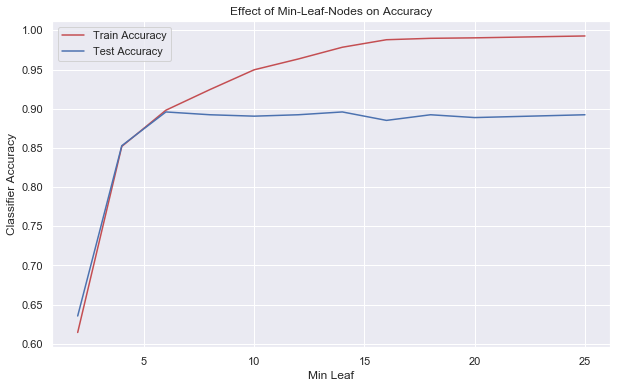

In [24]:
plt.plot(min_leaf, training_accuracy,'r')
plt.plot(min_leaf, testing_accuracy,'b')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.xlabel('Min Leaf')
plt.ylabel('Classifier Accuracy')
plt.title('Effect of Min-Leaf-Nodes on Accuracy')
plt.gcf().set_size_inches(10, 6)
plt.show()

So, min_sample_leafs=8 gives best accuracy without overfitting

#### For optimizing tree "max depth"

The maximum depth of the tree.

In [25]:
max_depth=[2,4,6,8,10,12,14,16,18,20,25]
training_accuracy=[]
testing_accuracy=[]
for c in max_depth:
    decision_tree_classifier = DecisionTreeClassifier(max_depth=c)
    clf = decision_tree_classifier.fit(X_train,y_train)
    
    y_train_predict = decision_tree_classifier.predict(X_train)
    y_predict = decision_tree_classifier.predict(X_test)

    train_acc_score_dt = accuracy_score(y_train,y_train_predict)
    test_acc_score_dt = accuracy_score(y_test,y_predict)
    training_accuracy.append(train_acc_score_dt)
    testing_accuracy.append(test_acc_score_dt)


In [26]:
accuracy_df=pd.DataFrame({'Max Depth':max_depth,
                              'Training Accuracy':training_accuracy,
                              'Testing Accuracy':testing_accuracy})
accuracy_df

,Max Depth,Training Accuracy,Testing Accuracy
0,2,0.614508,0.635548
1,4,0.851918,0.852783
2,6,0.898082,0.895871
3,8,0.923861,0.897666
4,10,0.949640,0.897666
5,12,0.962830,0.899461
6,14,0.977818,0.897666
7,16,0.988010,0.901257
8,18,0.989209,0.892280
9,20,0.990408,0.899461


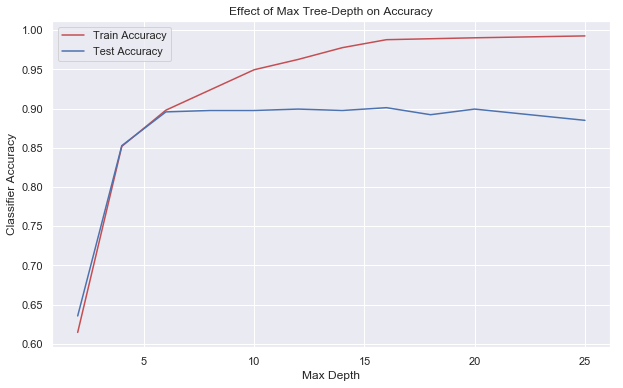

In [27]:

plt.plot(max_depth, training_accuracy,'r')
plt.plot(max_depth, testing_accuracy,'b')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.xlabel('Max Depth')
plt.ylabel('Classifier Accuracy')
plt.title('Effect of Max Tree-Depth on Accuracy')
plt.gcf().set_size_inches(10, 6)
plt.show()

So, max_depth=8 gives best accuracy without overfitting

#### Training Optimized DecisionTreeClassifier

In [28]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=8,min_samples_leaf=8,max_leaf_nodes=70)
clf=decision_tree_classifier.fit(X_train,y_train)
print("Tree nodes count:",clf.tree_.node_count)

Tree nodes count: 101


In [29]:
y_train_predict = decision_tree_classifier.predict(X_train)
y_predict = decision_tree_classifier.predict(X_test)

In [30]:
train_acc_score_dt = accuracy_score(y_train,y_train_predict)
test_acc_score_dt = accuracy_score(y_test,y_predict)
print("Decision Tree Scores")
print("Train Accuracy : ",train_acc_score_dt)
print("Test Accuracy :" ,test_acc_score_dt)

Decision Tree Scores
Train Accuracy :  0.89568345323741
Test Accuracy : 0.8886894075403949


*The tree has best testing_accuracy so far and also node_count is just 101 instead of 421*

In [31]:
dot_data = tree.export_graphviz(clf, out_file=None,
                      feature_names=X_features,  
                     class_names=data.true_label.values,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")

'decision_tree.pdf'

### Random Forest

In [32]:
random_forest_classifier = RandomForestClassifier(n_estimators=50,min_samples_leaf=5,max_depth=9)
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
y_train_predict = random_forest_classifier.predict(X_train)
y_predict = random_forest_classifier.predict(X_test)

In [34]:
train_acc_score_rf = accuracy_score(y_train,y_train_predict)
test_acc_score_rf = accuracy_score(y_test,y_predict)
print("Random Forest Classifier")
print("Train Accuracy : ",train_acc_score_rf)
print("Test Accuracy :" ,test_acc_score_rf)

Random Forest Classifier
Train Accuracy :  0.9154676258992805
Test Accuracy : 0.8868940754039497


,model,test_accuracy
0,Decision Tree,0.888689
1,Random Forest,0.886894
2,Extra Tree,0.888689


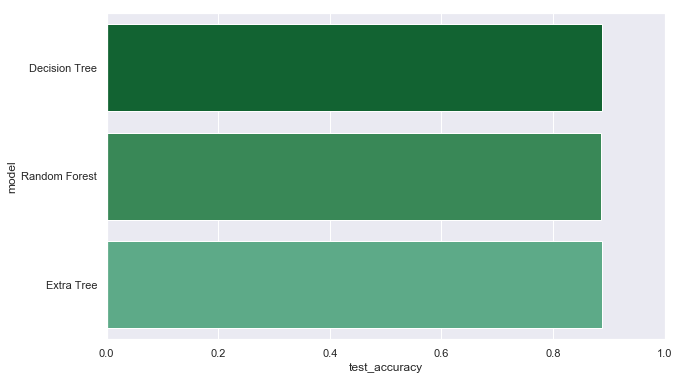

In [35]:
#accuracy plot
plt.Figure(figsize=(10,2))
df = pd.DataFrame([{"model":"Decision Tree","test_accuracy": test_acc_score_dt},
                 {"model":"Random Forest","test_accuracy": test_acc_score_rf},
                 {"model":"Extra Tree","test_accuracy": test_acc_score_ext}])
plt.figure(figsize=(10,6))
plt.xlim(0,1)
sns.barplot(x = 'test_accuracy', y = 'model', data = df, palette=sns.color_palette("BuGn_r"))
df

In [36]:
y_test.head(10)

384          politics
1983            sport
985             sport
1386            sport
1294            sport
1293    entertainment
1259         politics
1978         business
1123         business
1405            sport
Name: true_label, dtype: object

In [37]:
y_predict[:10]

array(['business', 'sport', 'sport', 'sport', 'sport', 'entertainment',
       'politics', 'business', 'business', 'sport'], dtype=object)

<h2 style = "color:purple">Testing On Sample Documents</h2>

#### Class Labels
* business = 1
* entertainment = 2
* politics = 3
* sport = 4
* tech = 5

In [38]:
def prepareDataFrame(txtFiles):
    dictionary_list = []
    stop_words = stopwords.words('english')
    for file in txtFiles: 
        file_object = open(file,'r',encoding = "ISO_8859_1") #open file
        text = file_object.read() #read text from file
        dictionary_list.append({"text":text})
        file_object.close() #close file_object pointer
    
    return pd.DataFrame(dictionary_list) 

In [39]:
true_labels = []
path = './DS Test Set/'
testFiles = []
for fileName in os.listdir(path):
    if fileName.endswith('.txt'):
        testFiles.append(path+fileName)
        if 'business' in fileName:
            true_labels.append('business')
        elif 'entertainment' in fileName:
            true_labels.append('entertainment')
        elif 'politic' in fileName:
            true_labels.append('politics')
        elif 'sport' in fileName:
            true_labels.append('sport')
        else :
            true_labels.append('tech')

In [40]:
test_data = prepareDataFrame(testFiles)
test_data_copy = test_data
test_data_copy

,text
0,The pound and shares in housebuilders and bank...
1,"Hong Kong, (UrduPoint / Pakistan Point News - ..."
2,"The dollar saw a Rs9.5 rise Friday morning, ju..."
3,A meticulously polished open-world ode to the ...
4,The big fat Bollywood wedding for this season ...
5,A Brand-New and Authentic Spider-Man Adventure...
6,"A political clobbering, bickering aides and no..."
7,"At a news conference, Georgia Democrats cast d..."
8,India leave on Friday for Australia where they...
9,"As his Red Devils tenure neared its end, the f..."


<p> The labels below are the true labels associated with each document listed above </p> 

In [41]:
true_labels

['business',
 'business',
 'business',
 'entertainment',
 'entertainment',
 'entertainment',
 'politics',
 'politics',
 'sport',
 'sport',
 'sport',
 'sport',
 'tech',
 'tech']

### Generate Features using trained LDAModel

In [42]:
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace() or token.like_url or token.orth_.startswith('@'):
            continue
#         elif token.like_url:
#             lda_tokens.append('URL')
#         elif token.orth_.startswith('@'):
#             lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
        
    return lda_tokens

#We use **NLTK’s Wordnet** to find the meanings of words, synonyms, antonyms, and more. In addition, we use **WordNetLemmatizer** to get the root word.
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

en_stop = set(nltk.corpus.stopwords.words('english'))

#To prepare RAW text for using in LDA model
def prepare_text_for_lda(text):
    #tokenize string
    #filter all words less than length 4
    #remove stopwords
    #Replace word with its base-synonym (if any)
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma2(get_lemma(token)) for token in tokens]
    return tokens

In [43]:
ldaModel=LdaModel.load('LdaModel.gensim')
vocabulary=Dictionary.load('dictionary.gensim')
document_topics_distribution=[]
for doc in test_data_copy['text']:
    new_doc=prepare_text_for_lda(doc)
    new_doc_bow = vocabulary.doc2bow(new_doc)
    doc_score=ldaModel.get_document_topics(new_doc_bow)  #returns document topic distribution (not necessariliy for all topics)
    scores=[]
    i=0
    for s in doc_score:
        while i<s[0]:
            scores.append(0)
            i+=1
        scores.append(s[1])
        i+=1
    if i<5:
        while i<5:
            scores.append(0)
            i+=1
    document_topics_distribution.append(scores)
document_topics_distribution[:5]

[[0.47869986, 0.036539838, 0, 0.4144051, 0.06962664],
 [0.5663648, 0, 0, 0.32747284, 0.09807325],
 [0.86296666, 0, 0, 0.11295199, 0.022076186],
 [0.079765804, 0.20021898, 0.30997446, 0.180586, 0.22945477],
 [0.16411488, 0.05734094, 0.48342887, 0.1581507, 0.13696466]]

In [44]:
header=['business','tech','entertainment','politics','sport']
topics_distribution_df=pd.DataFrame(document_topics_distribution,columns=header)
topics_distribution_df

,business,tech,entertainment,politics,sport
0,0.478700,0.036540,0.000000,0.414405,0.069627
1,0.566365,0.000000,0.000000,0.327473,0.098073
2,0.862967,0.000000,0.000000,0.112952,0.022076
3,0.079766,0.200219,0.309974,0.180586,0.229455
4,0.164115,0.057341,0.483429,0.158151,0.136965
5,0.000000,0.258768,0.526654,0.099098,0.112650
6,0.190712,0.048460,0.091757,0.484297,0.184774
7,0.114881,0.023360,0.056687,0.615842,0.189229
8,0.125355,0.016373,0.120685,0.119559,0.618028
9,0.013182,0.000000,0.059671,0.107369,0.818330


In [45]:
X_test = topics_distribution_df

In [46]:
pred_labels = extra_tree_classifier.predict(X_test)
pred_labels = list(pred_labels)

In [47]:
pred_accuracy = accuracy_score(true_labels,pred_labels)
pred_accuracy

0.8571428571428571

In [48]:
print("The true class labels for test document set:\n",true_labels)
print()
print("The predicted class labels for test document set:\n",pred_labels)

The true class labels for test document set:
 ['business', 'business', 'business', 'entertainment', 'entertainment', 'entertainment', 'politics', 'politics', 'sport', 'sport', 'sport', 'sport', 'tech', 'tech']

The predicted class labels for test document set:
 ['business', 'business', 'business', 'entertainment', 'entertainment', 'entertainment', 'business', 'politics', 'sport', 'sport', 'sport', 'sport', 'business', 'tech']


# Conclusion
### Need to improve entertainment and tech queries !!!